## **Campañas de marketing**
### Proyecto Final para **Data Science II** de Coderhouse


Lorenzo Guimaraes;
Comisión 60895.


#Introducción

Se seleccionó un dataset titulado "Marketing Campaign", el cual contiene información sobre la respuesta de clientes a diversas campañas de marketing de una empresa del sector venta y delivery de alimentos en Brasil.

##Objetivo

El objetivo de este proyecto es, a partir de este conjunto de datos, entrenar un modelo de predicción, que nos permita visualizar con anticipación una posibilidad de respuesta de los clientes en una próxima campña promocional

##Hipótesis

A partir de un análisis de los datos y el desarrollo de un modelo predictivo ajustado al caso, se podrá inferir y clasificar que tipos de cliente tienen mayor posibilidad de participar de una campaña promocional, así aumentar la precisión y rendimiento de la próxima campaña de marketing.



## Fuente y autoría

  *O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.*

  [Marketing Campaign - Kaggle](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/)

##Descripción de los datos

*   **ID:** Identificador de cliente.
*   **Year_Birth:** Año de nacimiento del cliente.
*   **Education:** Nivel de educación del cliente.
*   **Marital_status:** Estado civil del cliente.
*   **Income:** Ingresos anuales del hogar del cliente.
*   **Kidhome:** Número de niños pequeños en el hogar del cliente.
*   **Teenhome:** Número de adolescentes en el hogar del cliente.
*   **DtCustomer:** Fecha de alta del cliente en la empresa.
*   **Recency:** Número de días desde la última compra.
*   **MntFishProducts:** Monto gastado en productos pesqueros en los últimos 2 años.
*   **MntMeatProducts:** Monto gastado en productos cárnicos en los últimos 2 años.
*   **MntFruits:** Monto gastado en productos frutícolas en los últimos 2 años.
*   **MntSweetProducts:** Monto gastado en productos dulces en los últimos 2 años.
*   **MntWines:** Importe gastado en productos vitivinícolas en los últimos 2 años.
*   **MntGoldProds:** Monto gastado en productos de categoría "oro" en los últimos 2 años.
*   **NumDealsPurchases:** Número de compras realizadas con descuento.
*   **NumCatalogPurchases:** Número de compras realizadas mediante un catálogo.
*   **NumStorePurchases:** Número de compras realizadas en tiendas físicas.
*   **NumWebPurchases:** Número de compras realizadas a través de la página web de la empresa.
*   **NumWebVisitsMonth:** Número de visitas al sitio web de la empresa en el último mes.
*   **AcceptedCmp1:** Si el cliente aceptó la oferta en la primera campaña (1 = Sí, 2 = No)
*   **AcceptedCmp2:** Si el cliente aceptó la oferta en la segunda campaña (1 = Sí, 2 = No)
*   **AcceptedCmp3:** Si el cliente aceptó la oferta en la tercera campaña (1 = Sí, 2 = No)
*   **AcceptedCmp4:** Si el cliente aceptó la oferta en la cuarta campaña (1 = Sí, 2 = No)
*   **AcceptedCmp5:** Si el cliente aceptó la oferta en la quinta campaña (1 = Sí, 2 = No)
*   **Complain:** Si el cliente hizo algún reclamo en los últimos 2 años (1 = Sí, 2 = No)
*   **Response:** Si el cliente aceptó la oferta en la ÚLTIMA campaña (1 = Sí, 2 = No)


#Código

In [1]:
#Importación de librerías
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Definición del Dataset

url = "https://raw.githubusercontent.com/Larrentawn/marketing-campaign/main/marketing_campaign.csv"
df = pd.read_csv(url, sep=';',)

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


##Análisis introductorio


In [3]:
df.shape

(2240, 29)

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##Manipulación de datos nulos


In [7]:
# Verificacion de nulos y recuento
nulos = df.isnull()
print(nulos.sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [8]:
#Al ser los valores nulos de una sola columna, se pueden reemplazar directamente con .fillna
#Se utiliza la media ya que para este caso, un promedio del salario esta bien para los pocos valores nulos.

df = df.fillna(df["Income"].median())

#Se muestra la cantidad de nulos
print(f"Cantidad Nulos: %d\n" % df.isnull().to_numpy().sum())
df.isnull().sum()

Cantidad Nulos: 0



,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [9]:
df = pd.DataFrame(df)

In [10]:
#Chequeo de duplicados
df.duplicated().sum()

0

In [11]:
df[df.duplicated()].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [12]:
#Eliminamos duplicados
df=df.drop_duplicates()
print(df.shape)

(2240, 29)


## Análisis exploratorio

In [13]:
#Visualización general de pares de variables relevantes al análisis

columnas_visualizacion = ["Recency","NumDealsPurchases","Year_Birth", "Income" ,'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

#sns.pairplot(df[columnas_visualizacion], diag_kind='kde', plot_kws={'alpha':0.5}, height=2.5)
#plt.show()

<Axes: title={'center': 'Distribución de Estado civil'}, xlabel='Estado civil', ylabel='Frecuencia'>

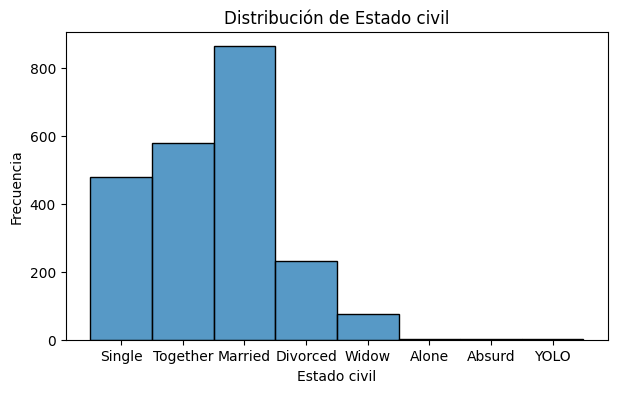

In [14]:
#Distribución por Estado civil

plt.figure(figsize=(7,4))
plt.title('Distribución de Estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Frecuencia')
sns.histplot(x='Marital_Status',data=df)


Se puede ver en la distribución, muy pocos datos en 3 de los valores de la columna de Estado civil.

<Axes: title={'center': 'Distribución de Ingresos'}, xlabel='Ingresos', ylabel='Frecuencia'>

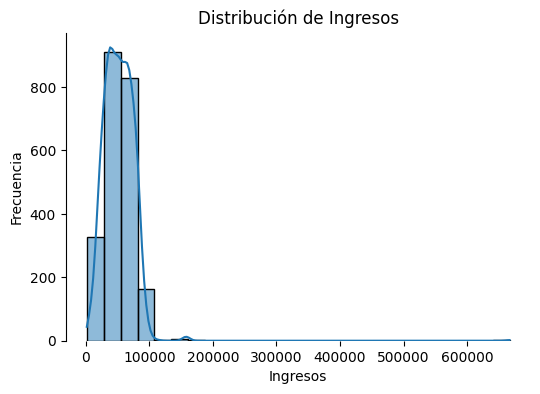

In [15]:
# Distribución de Ingresos

plt.figure(figsize=(6,4))
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
sns.despine(bottom=True)
sns.histplot(df.Income, bins=25, kde=True)

<Axes: title={'center': 'Distribución de Educación'}, xlabel='Educación', ylabel='Frecuencia'>

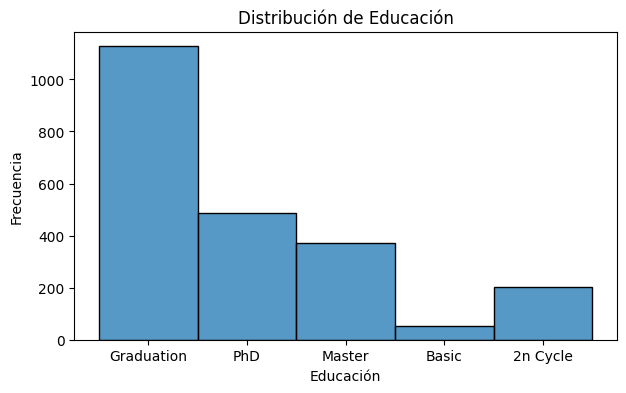

In [16]:
#Distribución por Educación

plt.figure(figsize=(7,4))
plt.title('Distribución de Educación')
plt.xlabel('Educación')
plt.ylabel('Frecuencia')
sns.histplot(x='Education',data=df)

In [17]:
df_num = df.select_dtypes(include=['int','float'])
df_num = df_num.drop(columns=['Z_Revenue','Z_CostContact'])
df_num.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

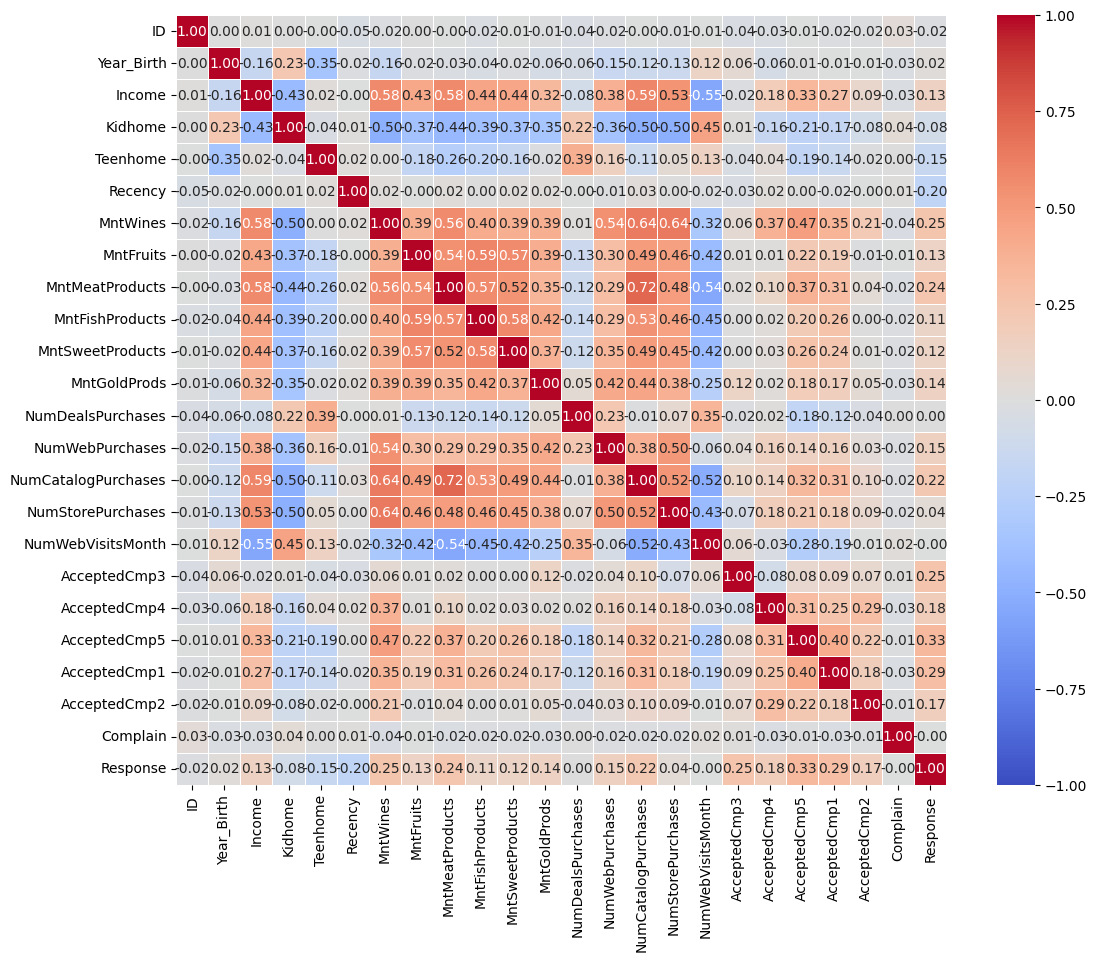

In [18]:

matriz_correlacion = df_num.corr()

# Create the heatmap
plt.figure(figsize = (13,10))
sns.heatmap(matriz_correlacion, vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5,cmap = 'coolwarm')
plt.show()

##Variables clave

###Las variables descriptivas relacionadas a clientes:

> 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer'

De las cuales:

Las variables categóricas:
*   **Education**: puede tratarse como una variable ordinal:     
Basic: 0, Graduation: 1, 2n Cycle: 2, Master: 3, PhD: 4.
* **Marital_Status**: puede convertirse a variables booleanas con una columna por categoría.

y:
 *   **Dt_Customer**: para simplificar una fecha a valores numericos, puede medirse como un una variable discreta: "Días como cliente".
 *  **Kidhome, Teenhome**: pueden unirse en una misma variable 'Hijos'
          

------


###Y las variables de información de compras:

  > 'Recency', 'MntWines', 'MntFruits',
      'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
      'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
      'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
      'AcceptedCmp2', 'Complain', 'Response'

De los cuales se podrían reducir:


> * **'NumDealsPurchases'** a la cantidad de descuentos u ofertas compradas

> * **'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'** al total de cantidad de compras

> * **'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', MntSweetProducts','MntGoldProds'**   
a
la sumatoria del monto total de productos comprados,

y

> *   **'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',  'AcceptedCmp2',**             
a
haber participado de alguna campaña.








##Visualización y tratamiento de outliers

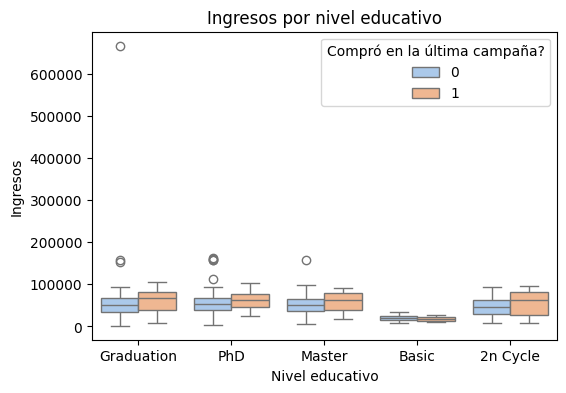

In [19]:
#Boxplot de salarios por nivel educativo

plt.figure(figsize=(6,4))
plt.title('Ingresos por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Ingresos')
sns.boxplot(x='Education', y='Income', hue='Response', data=df, palette='pastel')
plt.legend(title="Compró en la última campaña?", fancybox=True)

En este último, se puede ver un outlier excesivamente alejado del resto de los datos, el cual puede ser un error de input.

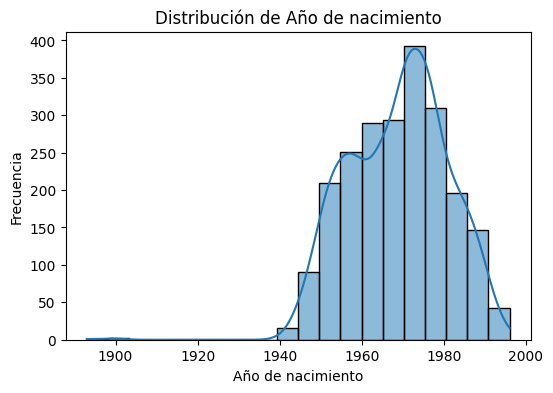

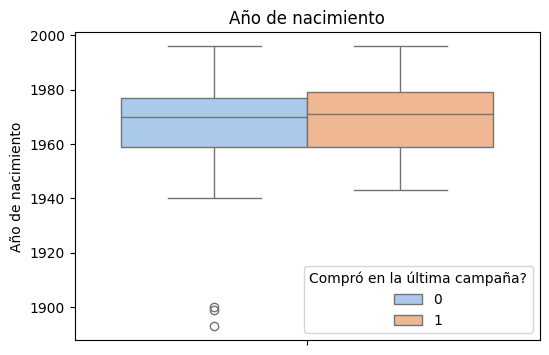

In [20]:
#Histograma de distribución de año de nacimiento/edad

plt.figure(figsize=(6,4))
plt.title('Distribución de Año de nacimiento')
plt.xlabel('Año de nacimiento')
plt.ylabel('Frecuencia')
sns.histplot(df.Year_Birth, bins=20, kde=True)

# Boxplot de Año de nacimiento y respuesta
plt.figure(figsize=(6,4))
plt.title('Año de nacimiento')
plt.xlabel('')
plt.ylabel('Año de nacimiento')
sns.boxplot(y=df.Year_Birth, hue='Response', palette='pastel', data=df)
plt.legend(title="Compró en la última campaña?", fancybox=True)

En la columna Año de Nacimiento tambien nos encontramos con outliers excesivamente alejados de la media.

No se aprecia una diferencia de edades en cuestión de si aceptó o no la campaña.

In [21]:
#Tratamiento de outliers de columna "Income"

# Se definen los quartiles y el rango (caja) inter-cuartil
Q1 = df.Income.quantile(0.25)
Q3 = df.Income.quantile(0.75)
RangoInterQuartil = Q3 - Q1

# Se definen los outliers mayores que el resultado de la suma de Q3 + rango intercuartil * 1.5
Income_outliers = df[df.Income > Q3 + 1.5 * RangoInterQuartil]

# Se aplican al dataframe los que no entran en la categoría de outlier
df = df[df.Income < Q3 + 1.5 * RangoInterQuartil]

#Vemos cuales fueron los datos que quedaron fuera
Income_outliers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,0,0,0,0,0,0,3,11,0


In [22]:
#Tratamiento de outliers de columna "Año de nacimiento"

# Primero modificamos la variable de Año de Nacimiento a Edad
df['Age'] = datetime.today().year - df['Year_Birth']

# Se definen los quartiles y el rango (caja) inter-cuartil
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
RangoInterQuartil = Q3 - Q1

# Se definen los outliers mayores que el resultado de la suma de Q3 + rango intercuartil * 1.5
Age_outliers = df[df.Age > Q3 + 1.5 * RangoInterQuartil]

# Se aplican al dataframe los que no entran en la categoría de outlier
df = df[df.Age < Q1 + 1.5 * RangoInterQuartil]

#Vemos cuales fueron los datos que quedaron fuera
Age_outliers.head()

<ipython-input-22-c5400273a61d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = datetime.today().year - df['Year_Birth']


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,3,11,0,124
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,11,0,131
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,1,0,0,0,3,11,0,125


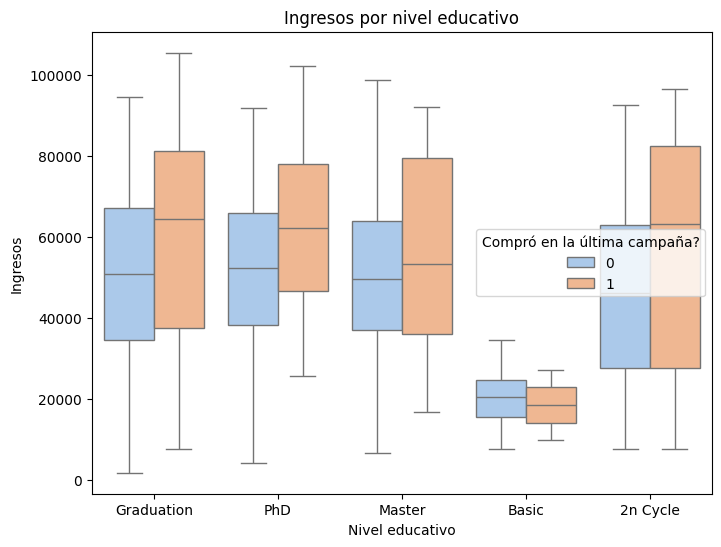

In [23]:
#Se visualiza el nuevo Boxplot de salarios por nivel educativo

plt.figure(figsize=(8,6))
plt.title('Ingresos por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Ingresos')
sns.boxplot(x='Education', y='Income', hue='Response', palette='pastel', data=df)
plt.legend(title="Compró en la última campaña?", fancybox=True)

Ahora se pueden ver los outliers reales de esta variable.

Se puede destacar, además de los ingresos por nivel educativo; **la relación entre haber participado de la última campaña, con el poder adquisitivo.**

<Axes: title={'center': 'Distribución de Edad'}, xlabel='Edad (años)', ylabel='Frecuencia'>

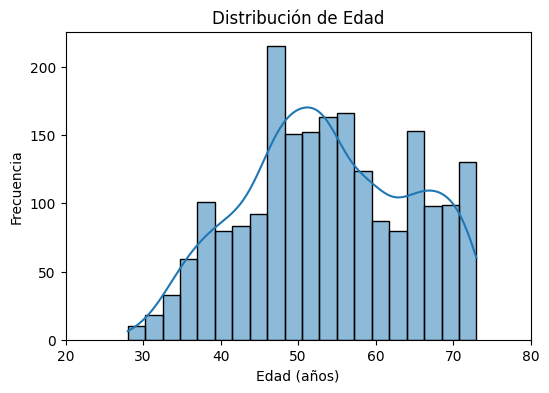

In [24]:
#Histograma de distribución de edad sin outlier

plt.figure(figsize=(6,4))
plt.title('Distribución de Edad')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.xlim(20,80)
sns.histplot(df['Age'], bins=20, kde=True)

Se puede observar una concentración mayor en el rango 45-60 y hasta los 70+ años.

Se puede ver la diferencia en cantidad de clientes que compraron en la ultima campaña y los que no.

##Modificación de variables y feature engineering

In [25]:
# Anexado de los tres valores bajos de Marital_Status a un solo: Soltero ("Single").
df['Marital_Status'] = df['Marital_Status'].replace(to_replace={'Alone', 'Absurd', 'YOLO'}, value='Single')
print('Columna estado civil: \n',df['Marital_Status'])

#Sumatoria hijos adolescentes y niños a una sola columna "hijos"
df['Children'] = df.loc[:,['Teenhome','Kidhome']].sum(axis=1)
print('Columna hijos: \n',df['Children'])

#Sumatoria de monto de productos comprados
df['MntTotalProducts'] = df.loc[:,['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)
print('Columna suma de monto productos: \n',df['MntTotalProducts'])

#Sumatoria de cantidad  de compras hechas
df['NumTotalPurchases'] = df.loc[:,['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
print('Columna cantidad de compras: \n',df['NumTotalPurchases'])

#Se hace una sumatoria las variables de las diversas campañas en las cuales se compró, a un recuento de en cuantas campañas compró
df['AcceptedCmpTotal'] = df.loc[:,['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
print('Columna total campaña aceptada: \n',df['AcceptedCmpTotal'])

Columna estado civil: 
 0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2234     Married
2235     Married
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2094, dtype: object
Columna hijos: 
 0       0
1       2
2       0
3       1
4       1
       ..
2234    1
2235    1
2237    0
2238    1
2239    2
Name: Children, Length: 2094, dtype: int64
Columna suma de monto productos: 
 0       1617
1         27
2        776
3         53
4        422
        ... 
2234      30
2235    1341
2237    1241
2238     843
2239     172
Name: MntTotalProducts, Length: 2094, dtype: int64
Columna cantidad de compras: 
 0       22
1        4
2       20
3        6
4       14
        ..
2234     3
2235    16
2237    18
2238    21
2239     8
Name: NumTotalPurchases, Length: 2094, dtype: int64
Columna total campaña aceptada: 
 0       0
1       0
2       0
3       0
4       0
       ..
2234    0
2235    0
2237    1
2238    0
22

In [ ]:
#Ahora al hacer la misma distribución por estado civil

plt.figure(figsize=(6,4))
plt.title('Distribución por Estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Frecuencia')
sns.histplot(x='Marital_Status',data=df)

<Axes: title={'center': 'Distribución por Estado civil'}, xlabel='Estado civil', ylabel='Frecuencia'>

In [ ]:

plt.figure(figsize=(6,4))
plt.title('Distribución por Monto gastado')
plt.xlabel('Monto gastado')
plt.ylabel('Frecuencia')
sns.histplot(data=df, x='MntTotalProducts', hue="Response")

In [ ]:
plt.figure(figsize=(4,3))
sns.catplot(data=df, x='Marital_Status', y="MntTotalProducts" , palette="pastel", height=6, alpha=0.7)

In [ ]:
# Count de cuantos compraron y cuantos no en la última campaña

recuento_response = df['Response'].value_counts()
label_response = [f'No: {recuento_response.values[0]}', f'Si: {recuento_response.values[1]}']

# Vistualizacion en Catplot
sns.catplot(data=df, x="Response", kind="count", palette="pastel", height=4)
plt.title('Recuento de clientes que compraron o no en la última campaña')

# Visualizacion en Piechart
plt.figure(figsize=(5,5))
plt.pie(recuento_response, labels=label_response, autopct='%1.1f%%',startangle=140)
plt.show()


In [ ]:
#Dristribución por cantidad de hijos

plt.figure(figsize=(6,4))
plt.title('Distribución por Cantidad de hijos')
plt.xlabel('Hijos')
plt.ylabel('Frecuencia')
plt.xlim([0,3])
sns.histplot(x='Children',data=df)

Se puede ver una mayor concentración de clientes con 1 hijo, siguiendole clientes sin hijos, y menor frecuencia de 2 y 3 hijos.

In [ ]:
#Ingresos por cantidad de hijos

plt.figure(figsize=(8,6))
plt.title('Ingresos por cantidad de hijos')
plt.xlabel('Cantidad de hijos')
plt.ylabel('Ingresos')
sns.boxplot(x='Children', y='Income', hue='Response', palette='pastel', data=df)
plt.legend(title="Compró en la última campaña?", fancybox=True)

In [ ]:
# Distplot de compras en cada campaña por grupos de cant. de hijos

fig, ax = plt.subplots()
#plt.title('Monto gastado en productos por campaña y cantidad de hijos',fontsize= "10")
#plt.xlabel('Campañas participadas')
#plt.ylabel('Monto gastado en productos')
plt.ylim([-100,3000])
sns.scatterplot(hue="Response",y='MntTotalProducts', x='Children', data=df, palette='deep', alpha=0.6, s=50)

In [ ]:
# Kdeplot de compras en cada campaña por grupos de cant. de hijos

fig, ax = plt.subplots()
plt.title('Monto gastado en productos por campaña y cantidad de hijos',fontsize= "10")
plt.xlabel('Campañas participadas')
plt.ylabel('Monto gastado en productos')
plt.ylim([-100,3000])
sns.kdeplot(x="AcceptedCmpTotal",y='MntTotalProducts', hue='Children', data=df, palette='deep')

En estos últimos gráficos se puede ver una tendencia en la cual:
* los grupos de **menor** cantidad de hijos, tuvieron **mayor** participación en campañas y **mayor** gasto en productos que los grupos con más hijos.

In [ ]:
# Otra visualización de la cantidad de compras por Ingresos, en grupos: sin hijos, 1, 2 y 3 hijos

sns.lmplot(data=df, x="Income", y="MntTotalProducts", col='Children', col_wrap=4, height=4, scatter_kws={"s": 25, "alpha": 1})

Se puede ver mas claramente la cantidad de incidencias en cada grupo (0,1,2 y 3 hijos) y la distribución de compras relacionada a los Ingresos.

In [ ]:
# Scatterplot para ver la relación entre gasto e ingresos

# Defino los grupos en compró o no compró
positivo = df[df['Response']==1]
negativo = df[df['Response']==0]
label_response = ['Si', 'No']

plt.figure(figsize=(12,6))
plt.scatter(positivo['MntTotalProducts'], positivo['Income'], color="orange", alpha=0.8, s=12,label="Response 1 (compró)")
plt.scatter(negativo['MntTotalProducts'], negativo['Income'], color="skyblue", alpha=0.6, s=7, label="Response 0 (no compró)")
plt.legend(labels=label_response)

plt.xlabel("Monto total gastado en productos")
plt.ylabel("Ingresos")
plt.show()

Se destaca la agrupación de casos en los que aceptaron la última campaña, gastaron más en productos, y tienden a tener mayores ingresos que la media de los que no aceptaron la última campaña.

------
## Modificación de variables categóricas y preparación del dataset

Las columnas categóricas a modificar son:

**Nivel educativo** y **Estado civil**

Se podrían plantear a través de un one-hot encoding, utilizando la función de dummy variables de Pandas.

También existe la columna **Dt_Customer**, la cual es la fecha en la que el usuario se resgistró. Ésta, al igual que la edad, es conveniente que se convierta a una variable discreta, como puede ser, días totales como cliente.

In [ ]:
# Se utiliza la función get_dummies de Pandas, la cuál separa las diversas variables categóricas, cada una a una columna con variable booleana (0 = no, 1 = si)

#Primero en la columna e nivel educativo
education_dummy = pd.get_dummies(df['Education'], prefix='education')
# Se añade las columnas dummies al dataframe
df_f = df.join(education_dummy)

#Tambíen con la columna de estado civil
marital_dummy = pd.get_dummies(df['Marital_Status'], prefix='marital')
# Se añaden las columnas dummies al dataframe
df_f = df.join(marital_dummy)


# Se convierte Dt_Customer a una variable discreta utilizando date_time

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Se calcula la fecha actual
fecha_actual = datetime.now()

# Se calcula y se añade los días como cliente al dataframe
df_f['Days_Customer'] = (fecha_actual - df['Dt_Customer']).dt.days


# Se eliminan las columnas que no se van a utilizar: Los datos únicos, y las columnas categóricas que fueron reemplazadas.

df_f.drop(columns=['ID', 'Kidhome','Teenhome','Marital_Status','Education','Year_Birth','Dt_Customer',
                   'Z_CostContact', 'Z_Revenue','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                   'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds',
                   'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'], inplace=True)


In [ ]:
# Vemos como se ve el dataframe.
df_f.head(5)

In [ ]:
df_f.info()
df_f.shape

In [ ]:
#Reordeno la columna response para que esté al final
response_columna = df_f.pop('Response')

# Agregar la columna 'Response' al final del DataFrame
df_f['Response'] = response_columna

##Visualización de correlaciones

In [ ]:
#Heatmap de correlacion

matriz_correlacion = df_f.corr()

plt.figure(figsize = (13,10))
sns.heatmap(matriz_correlacion, vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5,cmap = 'coolwarm')
plt.show()

En el heatmap podemos ver una alta correlacion entre diversas variables, y algunas que puede que sean dependientes entre si, como **MntTotalProducts** con **NumTotalPurchases** por lo que podrian quitarse para el entrenamiento.

In [ ]:
df_f = df_f.drop(columns=['NumTotalPurchases', 'MntTotalProducts'])
df_f

In [ ]:

#Se instancia la correlación sobre 'Response' con la función corr.
correlacion = df_f.corr()['Response'].sort_values(ascending=True)

# Selecciono las columnas a mostrar
top_correlacion_columnas = correlacion[0:34]

plt.figure(figsize=(12, 8))
sns.barplot(x=top_correlacion_columnas.values, y=top_correlacion_columnas.index, palette="deep", hue=top_correlacion_columnas.index, legend=False)

plt.title('Factor de correlación de variables con "Response"')
plt.xlabel('Correlación')
plt.ylabel('Variables')
plt.grid(True)
plt.show()

A partir del índice de correlación, se puede ver una *correlación negativa* baja-media entre **'Response'** y la **cantidad de Hijos**, junto a la **Recencia** de la última compra;
y una *correlación positiva* intermedia entre haber **aceptado las Campañas 1 y 5**, el **monto total gastado**, específicamente el monto gastado en **Carnes y Vinos**, y el hecho de haber comprado a través del **Catálogo**.

#Preparación y prueba de modelos

Separamos los datos en Y (la variable target) y X

In [ ]:
# Separamos el target variable en y
y = df_f['Response']

# Y separamos los datos en x
X = df_f.drop('Response', axis=1)

In [ ]:
# Separamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

##Escalado de datos

In [ ]:
# Escalamos los datos utilizando el StandardScaler de sklearn para normalizarlos
scaler = StandardScaler(with_mean=True, with_std=True)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Balanceo de variable Response

Para lograr buenos resultados es necesario que el muestreo de la variable target en nuestro caso "Response", esté distribuido equitativamente.

In [ ]:
# Visualización de distribución de datos Response
print("Comparación en el conjunto de train: {}".format(y_train.value_counts()))
print("Comparación en el conjunto de test: {}".format(y_test.value_counts()))

In [ ]:
# Se define el oversampler para balancear la cantidad de 0 y 1 en la variable Response
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)

In [ ]:
#Se aplica el resampleo
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

In [ ]:
print("Distribución luego de balancear en el conjunto de train: {}".format(y_train_balanced.value_counts()))

In [ ]:
X_train = X_train_balanced.copy()
y_train = y_train_balanced.copy()
print(type(y_train))
print(type(X_train))

In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
#Visualizamos la distribución de Response
recuento_response = y_train.value_counts()
label_response = [f'No: {recuento_response.values[0]}', f'Si: {recuento_response.values[1]}']

# Vistualizacion en Catplot
sns.catplot(data=y_train, x='Response', kind="count", palette="pastel", height=4)
plt.title('Recuento de clientes que compraron o no en la última campaña')

##PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Se aplica pca al train y test del conjunto de datos
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
varianza = pca.explained_variance_ratio_
varianza

In [ ]:
varianza_acumulada = np.cumsum(varianza)
varianza_acumulada

In [ ]:
componentes = np.arange(1, len(varianza) + 1)

plt.figure(figsize=(10, 6))
sns.lineplot(x=componentes, y=varianza_acumulada, marker='o', label='Varianza explicada acumulada')
plt.grid()
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza')
plt.title('Curva de varianza acumulada por PCA')
plt.legend()

plt.show()

Con la visualización de la varianza acumulada, podemos determinar que con 12  componentes ya es suficiente ya que con más no incrementa de forma significativa

In [ ]:
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Árbol de desición
Este caso es un problema de clasificación binario.

Primero se va a probar con el modelo de DecisionTreeClassifier de Sklearn, para realizar una clasificación de la variable **"Response"**, a partir del resto de los datos, predecir si esta variable sería 1 o 0 (Si o No compraría).

In [ ]:
# Instanciamos el modelo
tree = DecisionTreeClassifier(random_state=42, min_samples_leaf= 1, min_samples_split= 6)

In [ ]:
# Entrenamos el modelo
modelo_tree = tree.fit(X_train, y_train)

In [ ]:
# Probamos la predicción
y_prediccion = tree.predict(X_test)

In [ ]:
# Creamos la matriz de confusión
matriz_ctree = confusion_matrix(y_test, y_prediccion, labels= modelo_tree.classes_)

# Creamos la visualización de la matriz
matriz_visual_tree = ConfusionMatrixDisplay(confusion_matrix= matriz_ctree, display_labels= modelo_tree.classes_)
matriz_visual_tree.plot(values_format='')
plt.show()

In [ ]:
TN, FP, FN, TP = matriz_ctree.ravel()

# Calculo el porcentaje de falsos negativos y falsos positivos
total = len(y_test)
porcentaje_fn = (FN * 100) / total
porcentaje_fp = (FP * 100) / total

# Imprimir los resultados de forma simple
print(f'Porcentaje de falsos negativos: {porcentaje_fn:.2f}% ({FN}/{total})')
print(f'Porcentaje de falsos positivos: {porcentaje_fp:.2f}% ({FP}/{total})')

In [ ]:
# Medición de precisión de la predicción
print("Accuracy:", accuracy_score(y_test, y_prediccion))
print("Precision:", precision_score(y_test, y_prediccion))
print("Recall:", recall_score(y_test, y_prediccion))
print("F1 Score:", f1_score(y_test, y_prediccion))

Los resultados con el árbol de decisión no llegan a ser lo esperado. Están muy alejados de poder utilizarse ya que posee un resultado de precisión tan bajo que NO permite encontrar razonablemente los positivos reales, los cuales son los posibles compradores de la campaña.

## Árbol de desición con PCA

In [ ]:
# Instanciamos el modelo
tree = DecisionTreeClassifier(random_state=42, min_samples_leaf= 1, min_samples_split= 6)

In [ ]:
# Entrenamos el modelo
modelo_tree = tree.fit(X_train_pca, y_train)

In [ ]:
# Probamos la predicción
y_prediccion = tree.predict(X_test_pca)

In [ ]:
# Creamos la matriz de confusión
matriz_ctree = confusion_matrix(y_test, y_prediccion, labels= modelo_tree.classes_)

# Creamos la visualización de la matriz
matriz_visual_tree = ConfusionMatrixDisplay(confusion_matrix= matriz_ctree, display_labels= modelo_tree.classes_)
matriz_visual_tree.plot(values_format='')
plt.show()

In [ ]:
TN, FP, FN, TP = matriz_ctree.ravel()

# Calculo el porcentaje de falsos negativos y falsos positivos
total = len(y_test)
porcentaje_fn = (FN * 100) / total
porcentaje_fp = (FP * 100) / total

# Imprimir los resultados de forma simple
print(f'Porcentaje de falsos negativos: {porcentaje_fn:.2f}% ({FN}/{total})')
print(f'Porcentaje de falsos positivos: {porcentaje_fp:.2f}% ({FP}/{total})')

In [ ]:
# Medición de precisión de la predicción
print("Accuracy:", accuracy_score(y_test, y_prediccion))
print("Precision:", precision_score(y_test, y_prediccion))
print("Recall:", recall_score(y_test, y_prediccion))
print("F1 Score:", f1_score(y_test, y_prediccion))

Con el PCA los resultados mejoraron y se redujer los falsos positivos y falsos negativos, y mejoró el recall, la precisión y el F1

## Regresión logística

In [ ]:
#Instanciamos el modelo
modelo_regresion = LogisticRegression(random_state=42, max_iter=3500)

Para obtener buenos resultados con la regresión logística hay que primero estandarizar los datos, ya que los outliers y la varianza afectan mucho a la capacidad de predicción del modelo.

In [ ]:
#Entrenamos el modelo
clf_regresion = modelo_regresion.fit(X_train, y_train)

In [ ]:
#Probamos el modelo
prediccion_y = clf_regresion.predict(X_test)

In [ ]:
# Matriz de confusión
matriz_c = confusion_matrix(y_test, prediccion_y, labels= clf_regresion.classes_)

# Creamos la visualización de la matriz
visual_matriz = ConfusionMatrixDisplay(confusion_matrix= matriz_c, display_labels= clf_regresion.classes_)
visual_matriz.plot(values_format='')
plt.show()

In [ ]:
TN, FP, FN, TP = matriz_c.ravel()

# Calculo el porcentaje de falsos negativos y falsos positivos
total = len(y_test)
porcentaje_fn = (FN * 100) / total
porcentaje_fp = (FP * 100) / total

# Imprimir los resultados de forma simple
print(f'Porcentaje de falsos negativos: {porcentaje_fn:.2f}% ({FN}/{total})')
print(f'Porcentaje de falsos positivos: {porcentaje_fp:.2f}% ({FP}/{total})')

In [ ]:
# Medición de resultados de la predicción
print("Accuracy:", accuracy_score(y_test, prediccion_y))
print("Precision:", precision_score(y_test, prediccion_y))
print("Recall Score:", recall_score(y_test, prediccion_y))
print("f1 Score:", f1_score(y_test, prediccion_y))

En la matriz de confusión, podemos ver que son **104 falsos negativos** contra **434**  negativos reales.    

Y los **falsos positivos** son 9 contra 29 *positivos reales*.



## Regresión logística con PCA

In [ ]:
#Instanciamos el modelo
modelo_regresion = LogisticRegression(random_state=42, max_iter=3500)

In [ ]:
#Entrenamos el modelo
clf_regresion = modelo_regresion.fit(X_train_pca, y_train)

In [ ]:
#Probamos el modelo
prediccion_y = clf_regresion.predict(X_test_pca)

In [ ]:
# Matriz de confusión
matriz_c = confusion_matrix(y_test, prediccion_y, labels= clf_regresion.classes_)

# Creamos la visualización de la matriz
visual_matriz = ConfusionMatrixDisplay(confusion_matrix= matriz_c, display_labels= clf_regresion.classes_)
visual_matriz.plot(values_format='')
plt.show()

In [ ]:
TN, FP, FN, TP = matriz_c.ravel()

# Calculo el porcentaje de falsos negativos y falsos positivos
total = len(y_test)
porcentaje_fn = (FN * 100) / total
porcentaje_fp = (FP * 100) / total

# Imprimir los resultados de forma simple
print(f'Porcentaje de falsos negativos: {porcentaje_fn:.2f}% ({FN}/{total})')
print(f'Porcentaje de falsos positivos: {porcentaje_fp:.2f}% ({FP}/{total})')

In [ ]:
# Medición de resultados de la predicción
print("Accuracy:", accuracy_score(y_test, prediccion_y))
print("Precision:", precision_score(y_test, prediccion_y))
print("Recall Score:", recall_score(y_test, prediccion_y))
print("f1 Score:", f1_score(y_test, prediccion_y))

En el caso de la regresión logistica, utilizando el PCA los resultados están por debajo de los resultados anteriores



# Conclusiones

De este último modelo (Regresión logística) se obtuvo una muy buena exactitud (accuracy), pero con una precisión de .76, es decir acertaría en 3 de cada 4 clientes que SI aceptarían la campaña

Aún más bajo es el recall, por lo que pueden pasarse unos cuantos posibles compradores utilizando este modelo, ya que tendría muchos **falsos negativos**.

Dependiendo el presupuesto de la compañía para invertir en las campañas y promociones, puede ofrecerlas a algunos clientes demás, aunque el modelo diga que no aceptarían, y se podría mitigar el resultado de los falsos negativos.


Se puede predecir en cierto grado la aceptación de algunos clientes a las ofertas de las campañas de marketing, mas no con un alto grado de exactitud, al menos con estos modelos, ya que las variables son muchas. Sin embargo, el porcentaje de resolución que tuvo el modelo, a mi parecer la hipótesis se cumple, ya que permitiría tener un 75% de posibilidad en los clientes seleccionados por el modelo, para que realicen una compra en la campaña.